## Initialization

In [26]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from collections import deque
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error , r2_score

## Load Data

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset 
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes) 
X = auto_mpg.data.features
y = auto_mpg.data.targets

In [4]:
data = pd.concat([X, y], axis=1)
data

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1,27.0
394,97.0,4,52.0,2130,24.6,82,2,44.0
395,135.0,4,84.0,2295,11.6,82,1,32.0
396,120.0,4,79.0,2625,18.6,82,1,28.0


In [5]:
data.dropna(inplace=True)

## Train Test Split

In [8]:
X = data.drop(columns=['mpg'], inplace=False)
y = data['mpg']
np.random.seed(43)
X, y = shuffle(X, y)
train_size = 200
Xtrain, Xtest = X[:train_size], X[train_size:]
ytrain, ytest = y[:train_size], y[train_size:]
Ntr, Nte = len(ytrain), len(ytest)

## Normalization

In [10]:
scaler_X = StandardScaler().fit(Xtrain)
scaler_y = StandardScaler().fit(ytrain.values.reshape(-1, 1))
Xtrain, Xtest = scaler_X.transform(Xtrain), scaler_X.transform(Xtest)
ytrain, ytest = scaler_y.transform(ytrain.values.reshape(-1, 1)), scaler_y.transform(ytest.values.reshape(-1, 1))

## Linear Kernel

C:\Users\Snapp_Kitchen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2:1.0


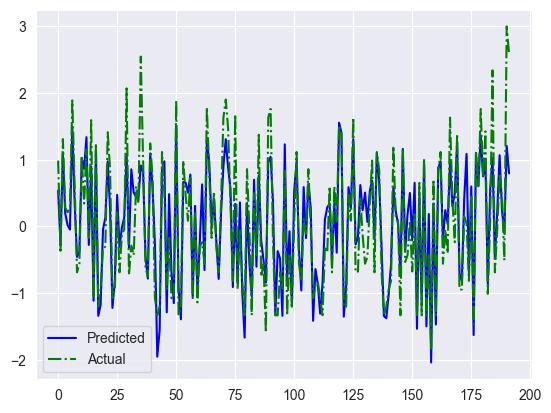

In [28]:
linear_model = SVR(kernel='linear')
linear_model.fit(Xtrain, ytrain)
y_pre_te = linear_model.predict(Xtest)
plt.plot(y_pre_te, 'b')
plt.plot(ytest, 'g-.')
plt.legend(['Predicted', 'Actual'])
plt.show()

## Polynomial Kernel

C:\Users\Snapp_Kitchen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Snapp_Kitchen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Snapp_Kitchen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Snapp_Kitchen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

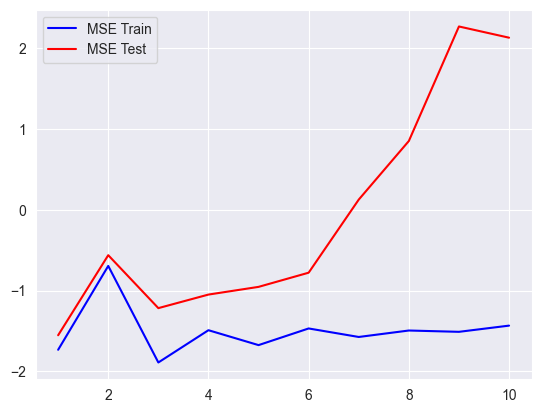

In [23]:
mse_te = []
mse_tr = []
degree_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for deg in degree_list:
    poly_model = SVR(kernel='poly', degree=deg)
    poly_model.fit(Xtrain, ytrain)
    y_pre_te = poly_model.predict(Xtest)
    y_pre_tr = poly_model.predict(Xtrain)
    mse_tr.append(mean_squared_error(ytrain, y_pre_tr))
    mse_te.append(mean_squared_error(ytest, y_pre_te))

plt.plot(degree_list , np.log(mse_tr) , 'b')
plt.plot(degree_list , np.log(mse_te), 'r')
plt.legend(['MSE Train', 'MSE Test'])
plt.show()
    
    

C:\Users\Snapp_Kitchen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2:1.0


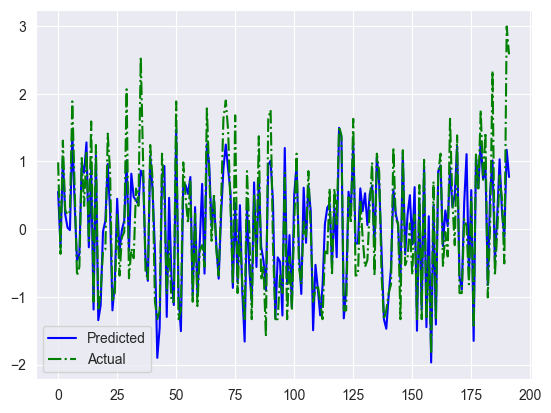

In [30]:
poly_model = SVR(kernel='poly', degree=1)
poly_model.fit(Xtrain, ytrain)
y_pre_poly = poly_model.predict(Xtest)
plt.plot(y_pre_poly, 'b')
plt.plot(ytest, 'g-.')
plt.legend(['Predicted', 'Actual'])
plt.show()


## RBF Kernel

C:\Users\Snapp_Kitchen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


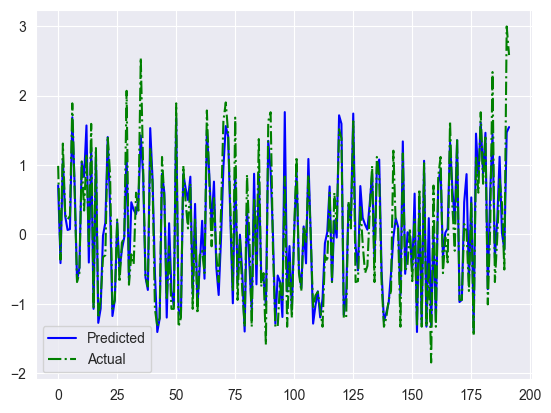

In [31]:
rbf_model = SVR(kernel='rbf')
rbf_model.fit(Xtrain, ytrain)
y_pre_rbf = rbf_model.predict(Xtest)
plt.plot(y_pre_rbf, 'b')
plt.plot(ytest, 'g-.')
plt.legend(['Predicted', 'Actual'])
plt.show()
